In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('crop_price_dataset.csv')
df.head()

,month,commodity_name,avg_modal_price,avg_min_price,avg_max_price,state_name,district_name,calculationType,change
0,2025-03-01,Maize,2341.58,2191.23,2402.98,India,All,Monthly,-14.43
1,2025-02-01,Maize,2356.01,2202.35,2414.46,India,All,Monthly,-26.19
2,2025-01-01,Maize,2382.20,2221.31,2448.22,India,All,Monthly,53.42
3,2024-12-01,Maize,2328.78,2164.86,2411.66,India,All,Monthly,55.32
4,2024-11-01,Maize,2273.46,2077.63,2377.78,India,All,Monthly,35.48


In [21]:
df.sample(5)

,month,commodity_name,avg_modal_price,avg_min_price,avg_max_price,state_name,district_name,calculationType,change
2315,2020-09-01,Turmeric,5931.70,5349.68,6453.51,India,All,Monthly,-26.20
2238,2011-11-01,Ginger(Dry),2359.34,2117.43,2594.18,India,All,Monthly,-54.62
164,2011-07-01,Maize,1091.74,1034.98,1137.79,India,All,Monthly,4.11
2079,2025-02-01,Ginger(Dry),6147.16,5684.63,6680.70,India,All,Monthly,-430.53
2788,2011-10-01,Coconut,4197.40,3628.98,4703.97,India,All,Monthly,-60.55


In [22]:
df = df.drop(columns=[
    'avg_min_price', 
    'avg_max_price', 
    'state_name', 
    'district_name', 
    'calculationType'
])
df

,month,commodity_name,avg_modal_price,change
0,2025-03-01,Maize,2341.58,-14.43
1,2025-02-01,Maize,2356.01,-26.19
2,2025-01-01,Maize,2382.20,53.42
3,2024-12-01,Maize,2328.78,55.32
4,2024-11-01,Maize,2273.46,35.48
...,...,...,...,...
2805,2010-05-01,Coconut,3093.35,-33.62
2806,2010-04-01,Coconut,3126.97,138.53
2807,2010-03-01,Coconut,2988.44,-127.26
2808,2010-02-01,Coconut,15745.70,12576.70


In [23]:
df = df.drop(df.index[2808])
df

,month,commodity_name,avg_modal_price,change
0,2025-03-01,Maize,2341.58,-14.43
1,2025-02-01,Maize,2356.01,-26.19
2,2025-01-01,Maize,2382.20,53.42
3,2024-12-01,Maize,2328.78,55.32
4,2024-11-01,Maize,2273.46,35.48
...,...,...,...,...
2804,2010-06-01,Coconut,3073.12,-20.23
2805,2010-05-01,Coconut,3093.35,-33.62
2806,2010-04-01,Coconut,3126.97,138.53
2807,2010-03-01,Coconut,2988.44,-127.26


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2809 entries, 0 to 2809
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            2809 non-null   object 
 1   commodity_name   2809 non-null   object 
 2   avg_modal_price  2809 non-null   float64
 3   change           2793 non-null   float64
dtypes: float64(2), object(2)
memory usage: 109.7+ KB


In [25]:
df.isnull().sum()

month               0
commodity_name      0
avg_modal_price     0
change             16
dtype: int64

In [26]:
df['change'] = df['change'].ffill()

In [28]:
df.iloc[2808]

month              2010-01-01
commodity_name        Coconut
avg_modal_price        3169.0
change                -127.26
Name: 2809, dtype: object

In [29]:
df.isnull().sum()

month              0
commodity_name     0
avg_modal_price    0
change             0
dtype: int64

In [30]:
df

,month,commodity_name,avg_modal_price,change
0,2025-03-01,Maize,2341.58,-14.43
1,2025-02-01,Maize,2356.01,-26.19
2,2025-01-01,Maize,2382.20,53.42
3,2024-12-01,Maize,2328.78,55.32
4,2024-11-01,Maize,2273.46,35.48
...,...,...,...,...
2804,2010-06-01,Coconut,3073.12,-20.23
2805,2010-05-01,Coconut,3093.35,-33.62
2806,2010-04-01,Coconut,3126.97,138.53
2807,2010-03-01,Coconut,2988.44,-127.26


In [31]:
# Convert to datetime
df['month'] = pd.to_datetime(df['month'])

# Extract year and month number as numeric features
df['year'] = df['month'].dt.year
df['month_num'] = df['month'].dt.month

# Optional: drop the original 'month' column
df = df.drop(columns=['month'])

In [32]:
df

,commodity_name,avg_modal_price,change,year,month_num
0,Maize,2341.58,-14.43,2025,3
1,Maize,2356.01,-26.19,2025,2
2,Maize,2382.20,53.42,2025,1
3,Maize,2328.78,55.32,2024,12
4,Maize,2273.46,35.48,2024,11
...,...,...,...,...,...
2804,Coconut,3073.12,-20.23,2010,6
2805,Coconut,3093.35,-33.62,2010,5
2806,Coconut,3126.97,138.53,2010,4
2807,Coconut,2988.44,-127.26,2010,3


In [33]:
df = pd.get_dummies(df, columns=['commodity_name'], drop_first=True) #one - hot encoding 

In [34]:
df

,avg_modal_price,change,year,month_num,commodity_name_Coconut,commodity_name_Coffee,commodity_name_Cotton,commodity_name_Ginger(Dry),commodity_name_Groundnut,commodity_name_Jowar(Sorghum),commodity_name_Maize,commodity_name_Millets,commodity_name_Rice,commodity_name_Sugar,commodity_name_Sugarcane,commodity_name_Sunflower,commodity_name_Tea,commodity_name_Turmeric,commodity_name_Wheat
0,2341.58,-14.43,2025,3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,2356.01,-26.19,2025,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,2382.20,53.42,2025,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,2328.78,55.32,2024,12,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,2273.46,35.48,2024,11,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,3073.12,-20.23,2010,6,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2805,3093.35,-33.62,2010,5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2806,3126.97,138.53,2010,4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2807,2988.44,-127.26,2010,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Model Training

In [35]:
# Features
X = df.drop(columns=['avg_modal_price'])

# Target
y = df['avg_modal_price']


In [38]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [39]:
X_test

,change,year,month_num,commodity_name_Coconut,commodity_name_Coffee,commodity_name_Cotton,commodity_name_Ginger(Dry),commodity_name_Groundnut,commodity_name_Jowar(Sorghum),commodity_name_Maize,commodity_name_Millets,commodity_name_Rice,commodity_name_Sugar,commodity_name_Sugarcane,commodity_name_Sunflower,commodity_name_Tea,commodity_name_Turmeric,commodity_name_Wheat
1539,-52.27,2010,2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2347,-26.99,2018,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2373,585.57,2015,11,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1487,-215.15,2014,6,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1097,-1450.00,2010,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,41.78,2020,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1000,128.16,2018,2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2431,-445.79,2011,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2181,-237.93,2016,8,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [40]:
X_train

,change,year,month_num,commodity_name_Coconut,commodity_name_Coffee,commodity_name_Cotton,commodity_name_Ginger(Dry),commodity_name_Groundnut,commodity_name_Jowar(Sorghum),commodity_name_Maize,commodity_name_Millets,commodity_name_Rice,commodity_name_Sugar,commodity_name_Sugarcane,commodity_name_Sunflower,commodity_name_Tea,commodity_name_Turmeric,commodity_name_Wheat
2473,-88.69,2022,10,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1922,55.22,2022,12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1089,-1028.05,2010,9,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1857,50.00,2014,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2247,-86.93,2011,2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,92.05,2017,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1095,-906.13,2010,3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1130,-134.89,2016,2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1294,28.86,2016,3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 7962612.41
R² Score: 0.73


In [43]:
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

comparison.head(20)

,Actual,Predicted
1539,2198.70,2458.583725
2347,7576.56,7867.097812
2373,8061.28,8066.704556
1487,3091.34,3166.002682
1097,8079.17,10244.441227
2271,13825.92,9282.548657
565,4097.74,4703.977714
1700,1658.97,1356.629819
2230,2950.07,5007.107199
1690,1398.77,1325.491429


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize model
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Random Forest RMSE: {np.sqrt(mse_rf):.2f}")


Random Forest R² Score: 0.8936
Random Forest RMSE: 1776.40


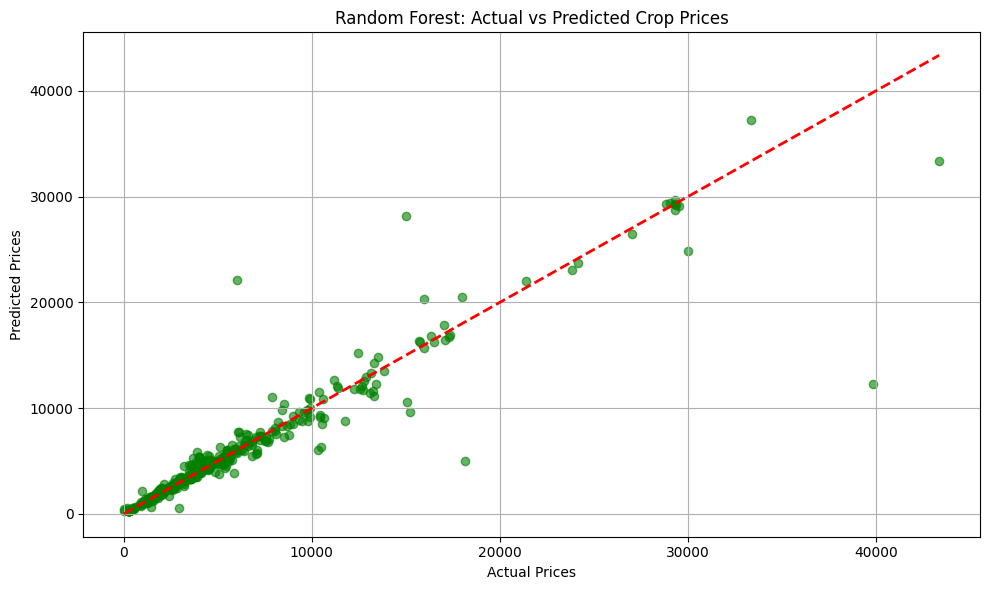

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Crop Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
import joblib

# Save the model
joblib.dump(rf, 'crop_prediction_model.pkl')

# To load it later:
# loaded_model = joblib.load('random_forest_crop_model.pkl')

['crop_prediction_model.pkl']

In [50]:
X_test.columns.tolist()

['change',
 'year',
 'month_num',
 'commodity_name_Coconut',
 'commodity_name_Coffee',
 'commodity_name_Cotton',
 'commodity_name_Ginger(Dry)',
 'commodity_name_Groundnut',
 'commodity_name_Jowar(Sorghum)',
 'commodity_name_Maize',
 'commodity_name_Millets',
 'commodity_name_Rice',
 'commodity_name_Sugar',
 'commodity_name_Sugarcane',
 'commodity_name_Sunflower',
 'commodity_name_Tea',
 'commodity_name_Turmeric',
 'commodity_name_Wheat']